In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
#matplotlib.style.use('ggplot')
#%matplotlib notebook            # Intractive plots
%matplotlib inline

# Importing and transforming the data

In [2]:
filename_1 = 'ex1data1.txt'      # Dataset for simple linear regression
filename_2 = 'ex1data2.txt'      # Dataset for multiple linear regression

In [3]:
# Load the data as numpy array
data = np.loadtxt(filename_1, delimiter = ',')

# 1 Simple linear regression
## 1.1 Splitting the data into dependent (X) and independent variables (y)
1. To account for intercept in the model we have to add a vector of ones to X to perform matrix operations on it.
2. To make the resulting numpy array 2-dimensional we have to pay attention to subsetting. To choose the last column corresponding to vector y use 'data[:, -1:]' which returns 2-dimensional array instead of data[:, -1], whcih returns 1-dimensional array.

In [4]:
# Splitting the data into dependent (X) and independent variables (y) 
X = np.insert(data[:, :-1], 0, 1, axis = 1)
y = data[:, -1:]
sampleSize, numThetas = X.shape

# 2 Visualizing the data

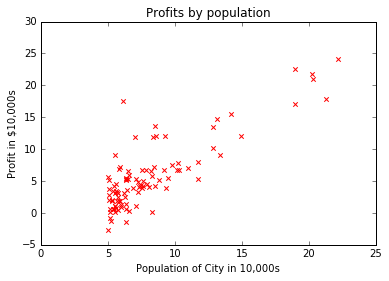

In [5]:
# Visualize the data (simple linear regression only!)
plt.scatter(X[:,1],y, c= 'red', marker = 'x')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title('Profits by population')
plt.show()

# 3 Gradient descent 

In [6]:
def computeCost(theta, X, y):
    '''
    Compute cost for linear regression using theta as the
    parameter for linear regression to fit the data points in X and y
    '''
    J = np.sum((np.dot(X, theta) - y)**2)/(2*sampleSize)
    return J
    
def gradientDescent(theta, X, y, alpha, iterations):
    '''
    Performs gradient descent to learn theta
    Updates theta by taking num_iters gradient steps with learning rate alpha
    '''
    J_history = []
    for i in range(iterations):
        theta = theta - alpha * 1/sampleSize * np.dot(X.T, (np.dot(X, theta) - y))
        J_history += [computeCost(theta, X, y)]
    return theta, J_history
    
def selectLearningRate(X, y, alphaset):
    iterations = 50
    for i in alphaset:
        alpha = i
        J_history = gradientDescent(theta, X, y, alpha, iterations)[1]
        plt.plot(range(iterations), J_history, label = str(i))
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Learning Rates (alpha)')
    plt.legend(loc = 'upper right', title = 'alpha')
    plt.show()

In [7]:
# Initilize fitting parameters
theta = np.zeros((numThetas,1))
iterations = 1500
alpha = 0.01

In [8]:
# Test computeCost function. Expected output value: 32.07
computeCost(theta, X, y) 

32.072733877455676

In [9]:
thetaFit, J_history = gradientDescent(theta, X, y, alpha, iterations)
# print('theta_initial_0 = ' + str(round(theta[0][0], 2)) 
#     + '\ntheta_initial_1 = ' + str(round(theta[1][0], 2)))
print('theta_0 = ' + str(round(thetaFit[0][0], 2)) 
    + '\ntheta_1 = ' + str(round(thetaFit[1][0], 2)))

theta_0 = -3.63
theta_1 = 1.17


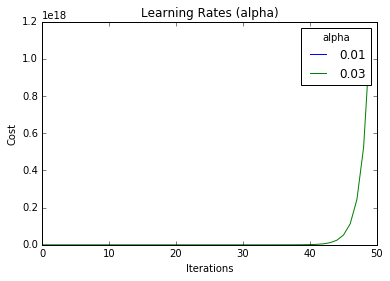

In [10]:
alphaset = [0.01, 0.03]
selectLearningRate(X, y, alphaset)

## 3.1 Visulization of cost function and linear regression fit

In [11]:
def visualizeConvergence(iterations, J_history):
    '''
    Visualize how the convergence of cost function to its minimum 
    Takes in number of iterations and vector of cost function values for each 
    iteration (cost function history)
    '''
    plt.plot(range(iterations), J_history)
    plt.show()

def visualizeRegression():
    '''
    Visualize the simple (!) linear regression based on thetas resulted 
    from Gradient Descent
    '''
    plt.scatter(X[:,1],y, c= 'red', marker = 'x')
    plt.plot(X[:,1], np.dot(X, thetaFit), color = 'blue')
    #plt.xlim(min(X[:,1]), max(X[:,1]))
    plt.xlabel('Population of City in 10,000s')
    plt.ylabel('Profit in $10,000s')
    plt.title('Profits by population')
    plt.show()

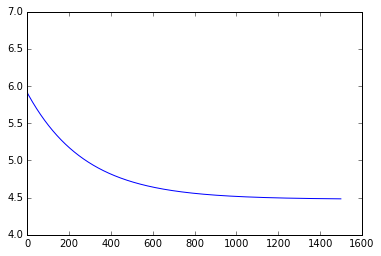

In [12]:
visualizeConvergence(iterations, J_history)

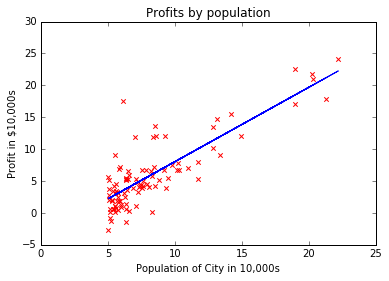

In [13]:
visualizeRegression()

## 3.2 Making predictions based on new thetas

In [14]:
point1 = np.array((1,3.5)).reshape(1,2)
point2 = np.array((1,7)).reshape(1,2)
predict1 = np.dot(point1,thetaFit)
predict2 = np.dot(point2,thetaFit)
print('Predicted profit for a city with population of ' +  str(point1[0][1]) + ' is ' + str(round(predict1[0][0],2)))
print('Predicted profit for a city with population of ' +  str(point2[0][1]) + ' is ' + str(round(predict2[0][0],2)))

Predicted profit for a city with population of3.5is 0.45
Predicted profit for a city with population of7is 4.53


# 4 Multiple linear regression

In [15]:
data = np.loadtxt(filename_2, delimiter = ',')

In [16]:
X = np.insert(data[:, :-1], 0, 1, axis = 1)
y = data[:, -1:]
sampleSize, numThetas = X.shape

In [17]:
# Initilize fitting parameters
theta = np.zeros((numThetas,1))
iterations = 1500
alpha = 0.01

## 4.1 Feature normalization

In [18]:
def normalize(X):
    copy = X.copy()
    if X.shape[1] <= 1:    
        for i in range(X.shape[1]):
            copy[:,i] = (X[:,i] - np.mean(X[:,i])) / np.std(X[:,i])
    else:
        for i in range(1, X.shape[1]):
            copy[:,i] = (X[:,i] - np.mean(X[:,i])) / np.std(X[:,i])
    return copy

In [19]:
norm_X = normalize(X)
norm_y = normalize(y)

In [20]:
computeCost(theta, norm_X, norm_y)

0.5

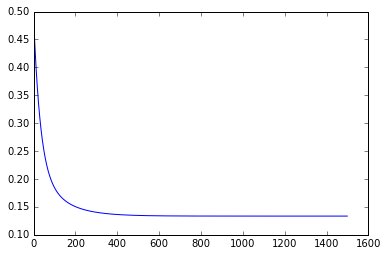

In [21]:
thetaFit, J_history = gradientDescent(theta, norm_X, norm_y, alpha, iterations)
visualizeConvergence(iterations, J_history)

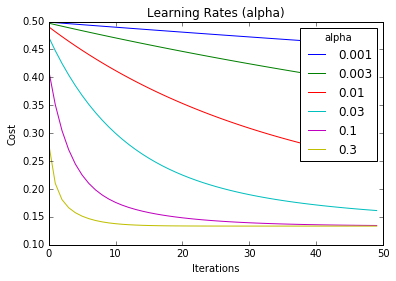

In [22]:
alphaset = [0.001, 0.003, 0.01, 0.03, 0.1, 0.3]
selectLearningRate(norm_X, norm_y, alphaset)